In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [85]:
start_date = '1987-01-01'
end_date = '2024-08-19'
major_markets = ['^HSI', '^GSPC', '^IXIC', '^FTSE']
df = yf.download(major_markets, start_date, end_date)
major_markets.append('^DJI')
df_close = df['Close']
df_close

[*********************100%%**********************]  4 of 4 completed


Ticker,^FTSE,^GSPC,^HSI,^IXIC
Date,,,,
1987-01-02,1681.099976,246.449997,2540.100098,353.200012
1987-01-05,1680.000000,252.190002,2552.399902,361.200012
1987-01-06,1690.699951,252.779999,2583.899902,366.000000
1987-01-07,1722.199951,255.330002,2607.100098,372.399994
1987-01-08,1733.099976,257.279999,2603.300049,377.500000
...,...,...,...,...
2024-08-12,8210.299805,5344.390137,17111.650391,16780.609375
2024-08-13,8235.200195,5434.430176,17174.060547,17187.609375
2024-08-14,8281.099609,5455.209961,17113.359375,17192.599609


In [86]:
dow = pd.read_csv('/Users/henrywzh/Documents/data/^DJI_start.csv')
dow.set_index(dow.columns[0], inplace=True)
dow.index = pd.to_datetime(dow.index)
dow = dow[dow.index >= start_date]
dow

,Open,High,Low,Close,Volume
Unnamed: 0,,,,,
1987-01-02,1897.40,1933.50,1897.40,1927.30,10852653.0
1987-01-05,1936.60,1980.70,1936.60,1971.30,25251497.0
1987-01-06,1971.30,1993.80,1961.90,1974.80,28560756.0
1987-01-07,1974.80,2003.10,1965.70,1994.00,22543742.0
1987-01-08,1994.00,2014.20,1976.00,2002.30,25350447.0
...,...,...,...,...,...
2024-06-25,39398.79,39423.26,38997.23,39112.16,313723096.0
2024-06-26,39063.15,39183.74,38908.99,39127.80,295320387.0
2024-06-27,39107.10,39250.69,39026.75,39164.06,414764915.0


In [72]:
data = pd.merge(df_close, dow['Close'], left_index=True, right_index=True)
data.rename(columns={'Close': '^DJI'}, inplace=True)
data.dropna(inplace=True)
data

,^FTSE,^GSPC,^HSI,^IXIC,^DJI
1987-01-02,1681.099976,246.449997,2540.100098,353.200012,1927.30
1987-01-05,1680.000000,252.190002,2552.399902,361.200012,1971.30
1987-01-06,1690.699951,252.779999,2583.899902,366.000000,1974.80
1987-01-07,1722.199951,255.330002,2607.100098,372.399994,1994.00
1987-01-08,1733.099976,257.279999,2603.300049,377.500000,2002.30
...,...,...,...,...,...
2024-06-24,8281.599609,5447.870117,18027.710938,17496.820312,39411.21
2024-06-25,8247.799805,5469.299805,18072.900391,17717.650391,39112.16
2024-06-26,8225.299805,5477.899902,18089.929688,17805.160156,39127.80
2024-06-27,8179.700195,5482.870117,17716.470703,17858.679688,39164.06


If us down, hsi up next day

In [73]:
for market in major_markets:
    data[f'{market} yesterday'] = data[market].shift(1)

df = data.dropna().pct_change().dropna() * 100
df

,^FTSE,^GSPC,^HSI,^IXIC,^DJI,^HSI yesterday,^GSPC yesterday,^IXIC yesterday,^FTSE yesterday,^DJI yesterday
1987-01-06,0.636902,0.233949,1.234133,1.328900,0.177548,0.484225,2.329075,2.265006,-0.065432,2.282987
1987-01-07,1.863134,1.008784,0.897875,1.748632,0.972250,1.234133,0.233949,1.328900,0.636902,0.177548
1987-01-08,0.632913,0.763716,-0.145758,1.369497,0.416249,0.897875,1.008784,1.748632,1.863134,0.972250
1987-01-09,1.107846,0.563593,-1.597976,0.847685,0.179793,-0.145758,0.763716,1.369497,0.632913,0.416249
1987-01-12,0.188320,0.606801,2.076744,1.260832,0.174485,-1.597976,0.563593,0.847685,1.107846,0.179793
...,...,...,...,...,...,...,...,...,...,...
2024-06-24,0.532909,-0.306517,-0.004485,-1.088446,0.666355,-1.673277,-0.156213,-0.181871,-0.420669,0.039786
2024-06-25,-0.408131,0.393359,0.250667,1.262115,-0.758794,-0.004485,-0.306517,-1.088446,0.532909,0.666355
2024-06-26,-0.272800,0.157243,0.094226,0.493913,0.039988,0.250667,0.393359,1.262115,-0.408131,-0.758794
2024-06-27,-0.554382,0.090732,-2.064458,0.300584,0.092671,0.094226,0.157243,0.493913,-0.272800,0.039988


0.006007960136021433


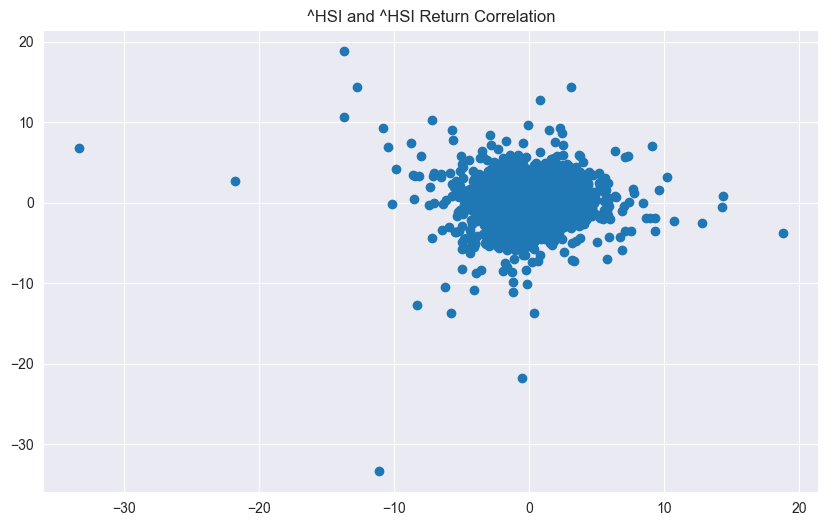

0.37147094223575944


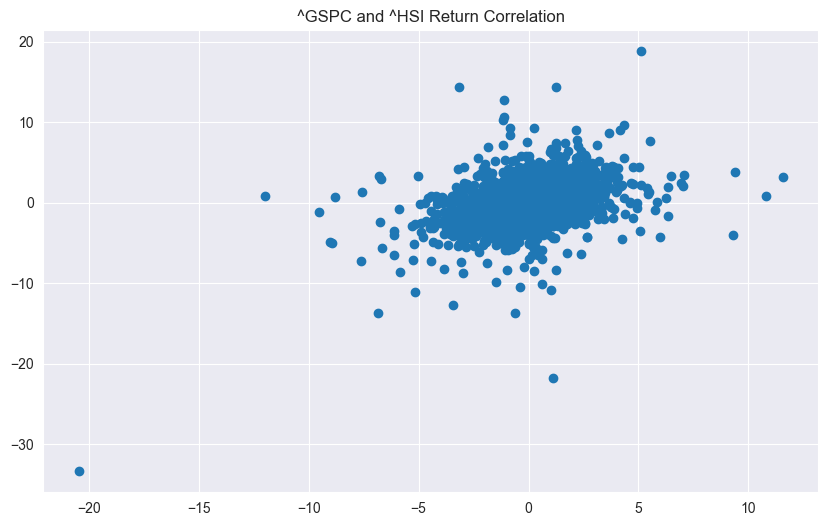

0.32722630060172636


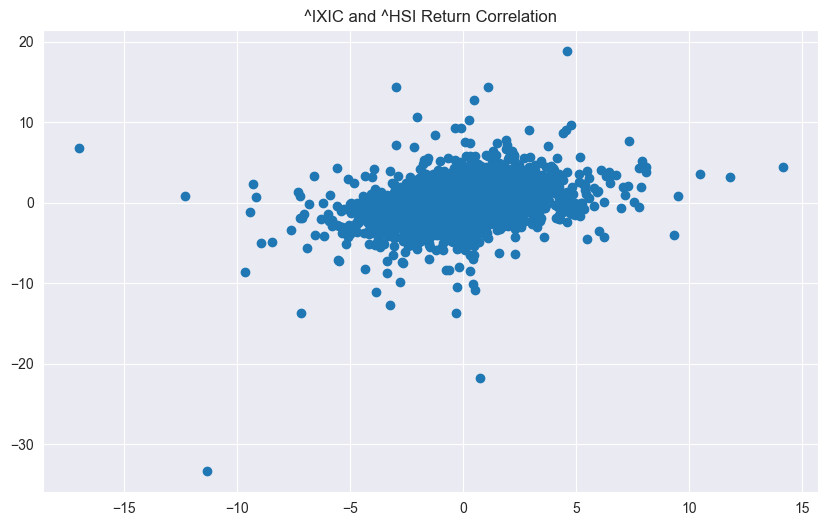

0.22555644952488366


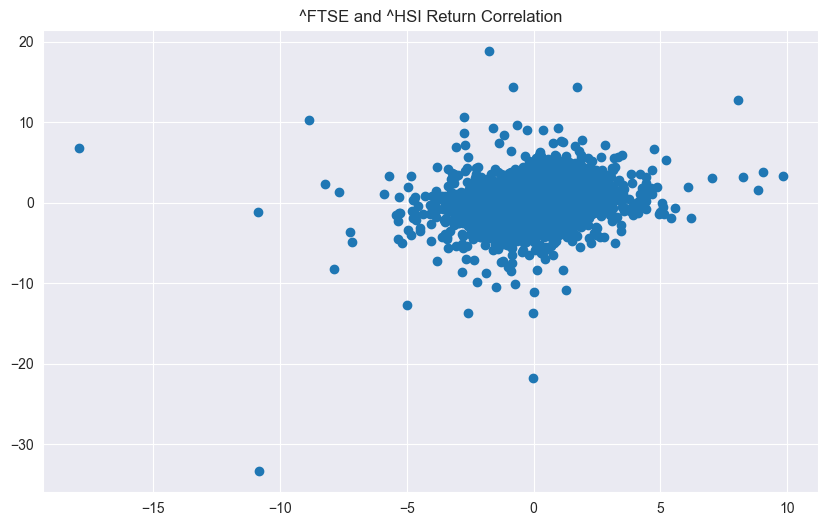

0.3567908425545209


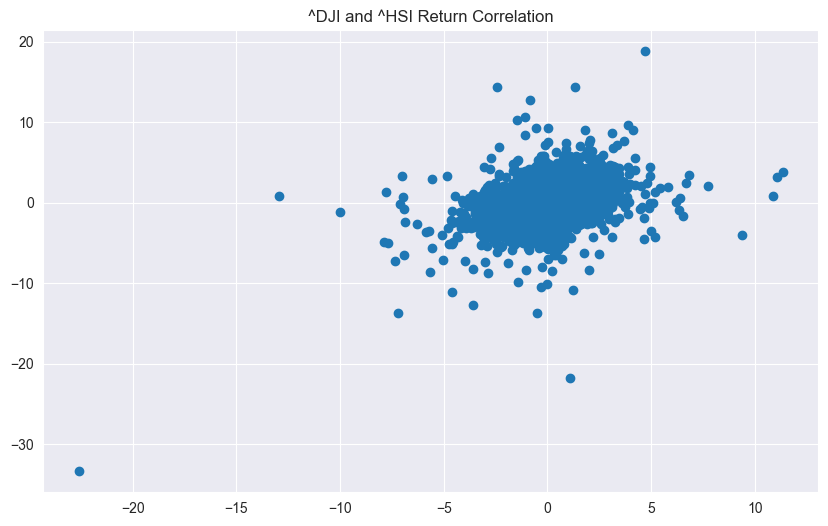

In [74]:
for m in major_markets:
    print(df[f'{m} yesterday'].corr(df['^HSI']))

    plt.figure(figsize=(10, 6))
    plt.scatter(df[f'{m} yesterday'], df['^HSI'])
    plt.title(f'{m} and ^HSI Return Correlation')
    plt.show()

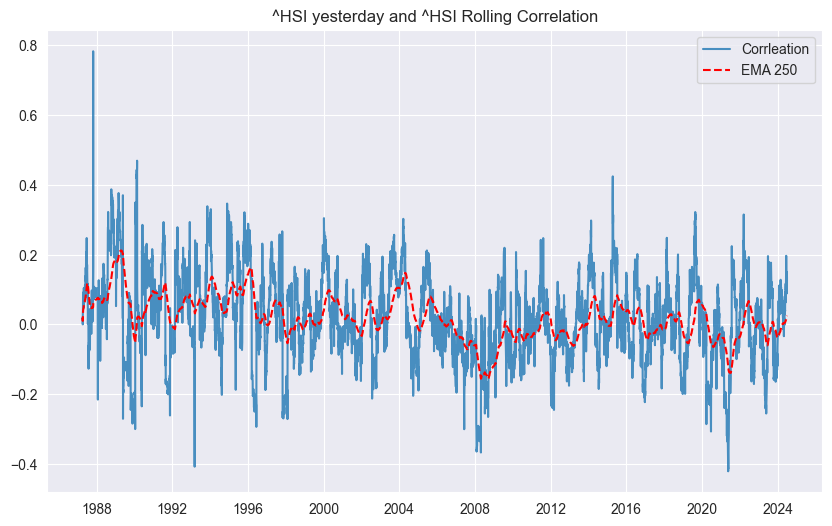

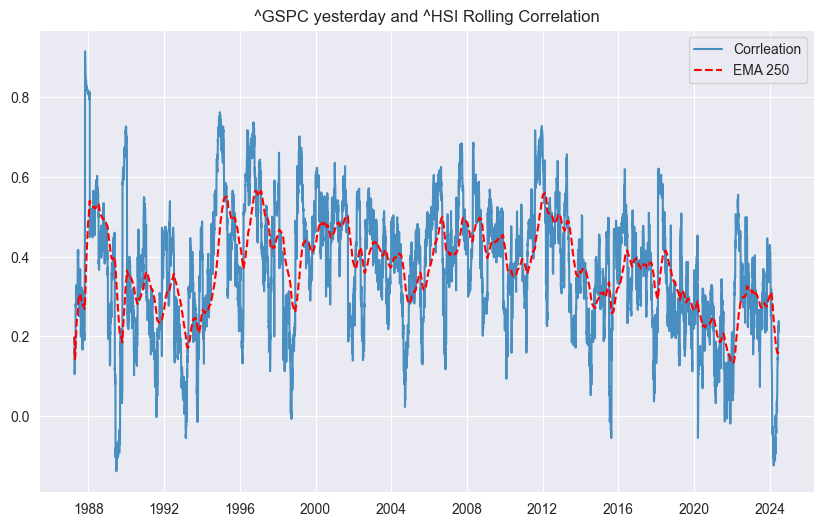

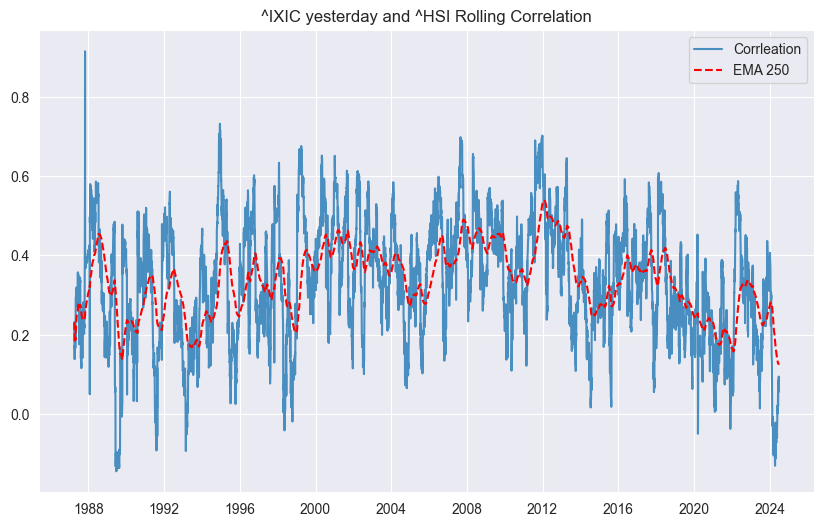

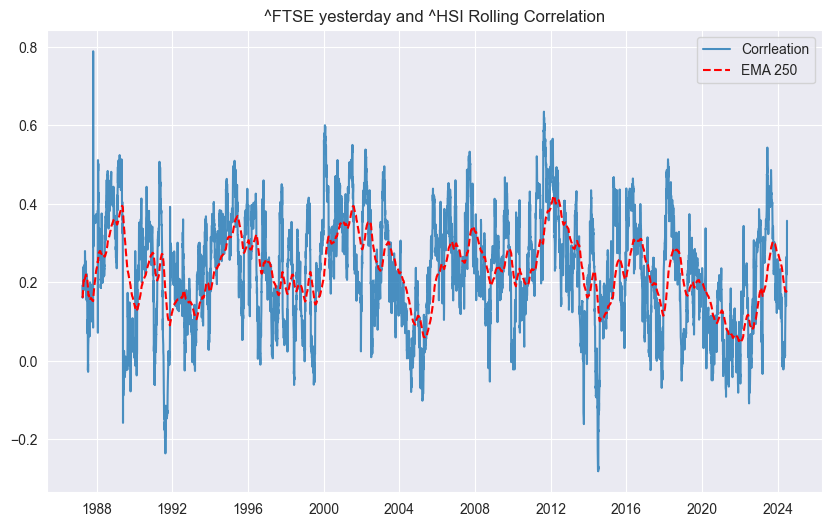

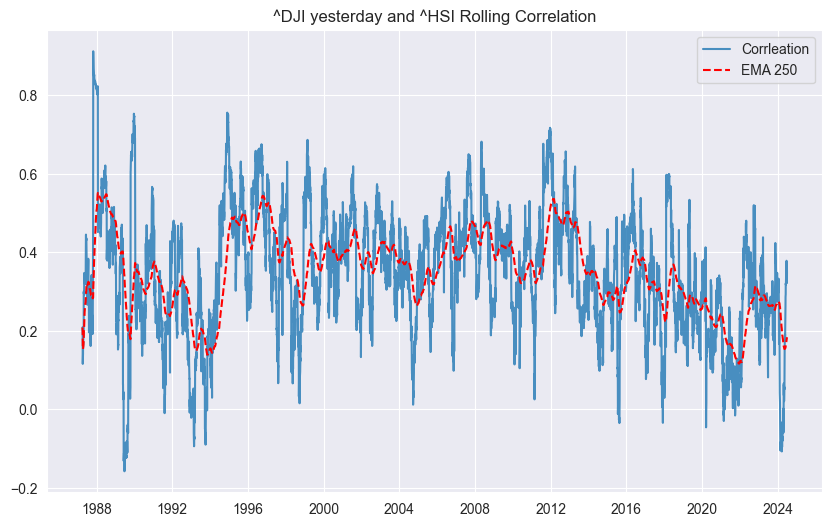

In [82]:
for market in major_markets:
    dates = []
    l = []
    for i in range(len(df) - 60):
        corr = df[f'{market} yesterday'].iloc[i:i + 60].corr(df['^HSI'].iloc[i:i + 60])
        l.append(corr)
        dates.append(df.index[i + 60])
    
    _data = pd.Series(data=l, index=dates)
    plt.figure(figsize=(10, 6))
    plt.plot(_data, alpha=0.8, label='Corrleation')
    plt.plot(_data.ewm(span=250).mean(), color='r', linestyle='--', label='EMA 250')
    plt.title(f'{market} yesterday and ^HSI Rolling Correlation')
    plt.legend()
    plt.show()